In [1]:
import numpy as np
import pandas as pd
from models.trees import DecisionTree

In [2]:
fruits_dataset = pd.DataFrame([
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
    ], columns=['color', 'diameter', 'label'])

X = fruits_dataset.iloc[:, :-1]
y = fruits_dataset.iloc[:, -1]

In [3]:
tree = DecisionTree()
tree.fit(X, y)
y_pred = tree.predict(X)
y_pred

array(['Apple', 'Lemon', 'Grape', 'Grape', 'Lemon'], dtype=object)

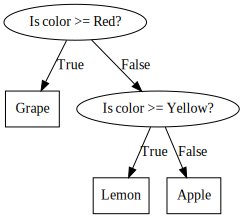

In [4]:
tree.print_tree()

In [5]:
testing_data = np.array([
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
])

X_test = testing_data[:, :-1]
y_test = testing_data[:, -1]

y_pred = tree.predict(X_test)
y_pred

array(['Apple', 'Grape', 'Grape', 'Grape', 'Grape'], dtype=object)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

X_train, y_train, X_test, y_test = train_test_split(X, y, train_size=0.8)

In [10]:
tree = DecisionTree()
tree.fit(X_train, y_train)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 120